In [15]:
# train_data 전체에 대해서도 series_decomp 적용가능한가?

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

df_new = pd.read_csv('./dataset/traffic/traffic.csv')
df_new = df_new.drop(columns=['date'])

df_new

,0,1,2,3,4,5,6,7,8,9,...,852,853,854,855,856,857,858,859,860,OT
0,0.0048,0.0146,0.0289,0.0142,0.0064,0.0232,0.0162,0.0242,0.0341,0.0375,...,0.0051,0.0051,0.0074,0.0079,0.0051,0.0051,0.0339,0.0051,0.0100,0.0121
1,0.0072,0.0148,0.0350,0.0174,0.0084,0.0240,0.0201,0.0338,0.0434,0.0381,...,0.0036,0.0036,0.0107,0.0058,0.0036,0.0036,0.0348,0.0036,0.0087,0.0136
2,0.0040,0.0101,0.0267,0.0124,0.0049,0.0170,0.0127,0.0255,0.0332,0.0309,...,0.0030,0.0030,0.0043,0.0050,0.0030,0.0030,0.0327,0.0030,0.0061,0.0107
3,0.0039,0.0060,0.0218,0.0090,0.0029,0.0118,0.0088,0.0163,0.0211,0.0199,...,0.0033,0.0033,0.0019,0.0052,0.0033,0.0033,0.0292,0.0033,0.0040,0.0071
4,0.0042,0.0055,0.0191,0.0082,0.0024,0.0095,0.0064,0.0087,0.0144,0.0226,...,0.0049,0.0049,0.0011,0.0071,0.0049,0.0049,0.0264,0.0049,0.0040,0.0039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,0.0342,0.0332,0.1378,0.0559,0.0165,0.0386,0.0457,0.0687,0.0716,0.0518,...,0.0139,0.0179,0.0278,0.0280,0.0227,0.0375,0.0142,0.0201,0.0341,0.0429
17540,0.0285,0.0253,0.0542,0.0485,0.0131,0.0331,0.0372,0.0569,0.0669,0.0409,...,0.0116,0.0155,0.0201,0.0267,0.0207,0.0320,0.0122,0.0163,0.0306,0.0363
17541,0.0276,0.0257,0.0551,0.0474,0.0121,0.0326,0.0381,0.0566,0.0675,0.0386,...,0.0109,0.0142,0.0208,0.0252,0.0189,0.0287,0.0123,0.0152,0.0292,0.0325
17542,0.0232,0.0229,0.0496,0.0435,0.0119,0.0297,0.0361,0.0517,0.0598,0.0360,...,0.0092,0.0124,0.0219,0.0215,0.0169,0.0258,0.0096,0.0130,0.0252,0.0279


In [16]:


num_total = len(df_new)
num_train = int(num_total * 0.7)
num_test = int(num_total * 0.2)
num_vali = num_total - num_train - num_test
border1s = [0, num_train - 96, num_total - num_test - 96]
border2s = [num_train, num_train + num_vali, num_total]

In [17]:
# weather_df에서 train data 얻기
scaler = StandardScaler()
train_data = df_new[border1s[0]:border2s[0]]
scaler.fit(train_data.values)
df_data = scaler.transform(df_new.values)

In [18]:
# decomp 정
import torch
import torch.nn as nn
from layers.Autoformer_EncDec import series_decomp, moving_avg
decomp = series_decomp(25)

In [19]:
# 전체에서도 series_decomp 시전 가능?

df_data_s , df_data_t = decomp(torch.Tensor(df_data).reshape(1, df_data.shape[0], df_data.shape[1]))

In [20]:
# 파일 저장
theme = 'traffic'
np.savez(f'./dataset/{theme}/{theme}_decomp_s.npz', data=df_data_s.reshape(df_data.shape[0], df_data.shape[1], 1))
np.savez(f'./dataset/{theme}/{theme}_decomp_t.npz', data=df_data_t.reshape(df_data.shape[0], df_data.shape[1], 1))

In [21]:
# composition 분석

In [22]:
import json

with open('./coeff_vectors_val_Exchange_96_48_piformer_custom.json', 'r', encoding='utf8') as X:
    coeff_vector_vals = json.load(X)

In [24]:
len(coeff_vector_vals)

2584

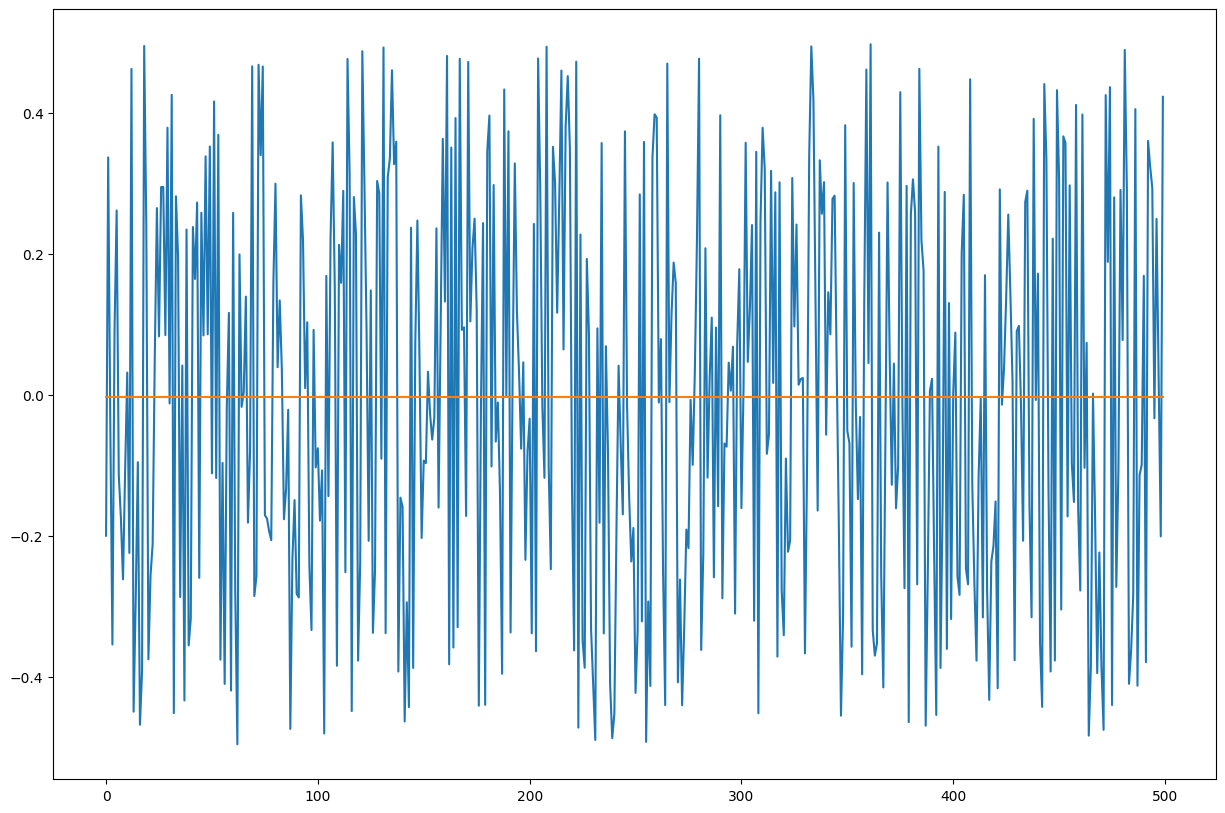

In [34]:
import matplotlib.pyplot as plt

coeff_vector_vals = np.array(coeff_vector_vals)
idx = 4
jdx = 0
plt.figure(figsize=(15, 10))
plt.plot(range(500), coeff_vector_vals[jdx*500:(jdx+1)*500, 0, idx])
plt.plot(range(500), np.mean(coeff_vector_vals[jdx*500:(jdx+1)*500, 0, idx]) * np.ones(500))
plt.show()

In [ ]:
# corrcoef


In [ ]:
# 그럼 진짜 LinearRegression에 맞게 된건지 검증해봅시다. 
#training 데이터 

In [35]:
import argparse
import torch
import torch.nn as nn
from exp.exp_long_term_forecasting import Exp_Long_Term_Forecast
from exp.exp_imputation import Exp_Imputation
from exp.exp_short_term_forecasting import Exp_Short_Term_Forecast
from exp.exp_long_term_forecasting_partial import Exp_Long_Term_Forecast_Partial
from exp.exp_anomaly_detection import Exp_Anomaly_Detection
from exp.exp_classification import Exp_Classification
from utils.print_args import print_args
import random
import numpy as np
import time

In [36]:
# fix random seed
fix_seed = 2021
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)
parser = argparse.ArgumentParser(description='TimesNet')

In [37]:
# config 지정 -> 오류 방지를 위해 

# basic config
parser.add_argument('--task_name', type=str, default='long_term_forecast',
                    help='task name, options:[long_term_forecast, short_term_forecast, imputation, classification, anomaly_detection]')
parser.add_argument('--is_training', type=int, default=1, help='status')
parser.add_argument('--model_id', type=str, default='test', help='model id')
parser.add_argument('--model', type=str, default='Autoformer',
                    help='model name, options: [Autoformer, Transformer, TimesNet]')

# data loader
parser.add_argument('--data', type=str, default='ETTm1', help='dataset type')
parser.add_argument('--root_path', type=str, default='./data/ETT/', help='root path of the data file')
parser.add_argument('--data_path', type=str, default='ETTh1.csv', help='data file')
parser.add_argument('--features', type=str, default='M',
                    help='forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate')
parser.add_argument('--target', type=str, default='OT', help='target feature in S or MS task')
parser.add_argument('--freq', type=str, default='h',
                    help='freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h')
parser.add_argument('--checkpoints', type=str, default='./checkpoints/', help='location of model checkpoints')

# added option 
parser.add_argument('--train_ratio', type=float, default=0.7, help='train data ratio')
parser.add_argument('--test_ratio', type=float, default=0.2, help='test data ratio')
parser.add_argument('--train_step', type=float, default=1.0, help='train data with certain stes. for example train_step=2 means only train even number of data')

# SparseTSF
parser.add_argument('--period_len', type=int, default=24, help='period length')

# PITS
parser.add_argument('--fc_dropout', type=float, default=0.05, help='fully connected dropout')
parser.add_argument('--head_dropout', type=float, default=0.0, help='head dropout')
parser.add_argument('--patch_len', type=int, default=16, help='patch length')
parser.add_argument('--stride', type=int, default=8, help='stride')
parser.add_argument('--shared_embedding', type=int, default=1, help='stride')
parser.add_argument('--padding_patch', default='end', help='None: None; end: padding on the end')
parser.add_argument('--revin', type=int, default=1, help='RevIN; True 1 False 0')
parser.add_argument('--affine', type=int, default=0, help='RevIN-affine; True 1 False 0')
parser.add_argument('--subtract_last', type=int, default=0, help='0: subtract mean; 1: subtract last')
parser.add_argument('--decomposition', type=int, default=0, help='decomposition; True 1 False 0')
parser.add_argument('--kernel_size', type=int, default=25, help='decomposition-kernel')
parser.add_argument('--individual', type=int, default=0, help='individual head; True 1 False 0')

# Piformer
parser.add_argument('--joint_var', type=int, default=0, help='use attention for each patching; True 1 False 0')

# forecasting task
parser.add_argument('--seq_len', type=int, default=96, help='input sequence length')
parser.add_argument('--label_len', type=int, default=48, help='start token length')
parser.add_argument('--pred_len', type=int, default=96, help='prediction sequence length')
parser.add_argument('--seasonal_patterns', type=str, default='Monthly', help='subset for M4')
parser.add_argument('--inverse', action='store_true', help='inverse output data', default=False)

# inputation task
parser.add_argument('--mask_rate', type=float, default=0.25, help='mask ratio')

# anomaly detection task
parser.add_argument('--anomaly_ratio', type=float, default=0.25, help='prior anomaly ratio (%)')

# model define
parser.add_argument('--expand', type=int, default=2, help='expansion factor for Mamba')
parser.add_argument('--d_conv', type=int, default=4, help='conv kernel size for Mamba')
parser.add_argument('--top_k', type=int, default=5, help='for TimesBlock')
parser.add_argument('--num_kernels', type=int, default=6, help='for Inception')
parser.add_argument('--enc_in', type=int, default=7, help='encoder input size')
parser.add_argument('--dec_in', type=int, default=7, help='decoder input size')
parser.add_argument('--c_out', type=int, default=7, help='output size')
parser.add_argument('--d_model', type=int, default=512, help='dimension of model')
parser.add_argument('--n_heads', type=int, default=8, help='num of heads')
parser.add_argument('--e_layers', type=int, default=2, help='num of encoder layers')
parser.add_argument('--d_layers', type=int, default=1, help='num of decoder layers')
parser.add_argument('--d_ff', type=int, default=2048, help='dimension of fcn')
parser.add_argument('--moving_avg', type=int, default=25, help='window size of moving average')
parser.add_argument('--factor', type=int, default=1, help='attn factor')
parser.add_argument('--distil', action='store_false',
                    help='whether to use distilling in encoder, using this argument means not using distilling',
                    default=True)
parser.add_argument('--dropout', type=float, default=0.1, help='dropout')
parser.add_argument('--embed', type=str, default='timeF',
                    help='time features encoding, options:[timeF, fixed, learned]')
parser.add_argument('--activation', type=str, default='gelu', help='activation')
parser.add_argument('--output_attention', action='store_true', help='whether to output attention in ecoder')
parser.add_argument('--channel_independence', type=int, default=1,
                    help='0: channel dependence 1: channel independence for FreTS model')
parser.add_argument('--decomp_method', type=str, default='moving_avg',
                    help='method of series decompsition, only support moving_avg or dft_decomp')
parser.add_argument('--use_norm', type=int, default=1, help='whether to use normalize; True 1 False 0')
parser.add_argument('--down_sampling_layers', type=int, default=0, help='num of down sampling layers')
parser.add_argument('--down_sampling_window', type=int, default=1, help='down sampling window size')
parser.add_argument('--down_sampling_method', type=str, default=None,
                    help='down sampling method, only support avg, max, conv')
parser.add_argument('--seg_len', type=int, default=48,
                    help='the length of segmen-wise iteration of SegRNN')

# optimization
parser.add_argument('--num_workers', type=int, default=10, help='data loader num workers')
parser.add_argument('--itr', type=int, default=1, help='experiments times')
parser.add_argument('--train_epochs', type=int, default=10, help='train epochs')
parser.add_argument('--batch_size', type=int, default=32, help='batch size of train input data')
parser.add_argument('--patience', type=int, default=3, help='early stopping patience')
parser.add_argument('--learning_rate', type=float, default=0.0001, help='optimizer learning rate')
parser.add_argument('--des', type=str, default='test', help='exp description')
parser.add_argument('--loss', type=str, default='MSE', help='loss function')
parser.add_argument('--lradj', type=str, default='type1', help='adjust learning rate')
parser.add_argument('--use_amp', action='store_true', help='use automatic mixed precision training', default=False)

# GPU
parser.add_argument('--use_gpu', type=bool, default=True, help='use gpu')
parser.add_argument('--gpu', type=int, default=0, help='gpu')
parser.add_argument('--use_multi_gpu', action='store_true', help='use multiple gpus', default=False)
parser.add_argument('--devices', type=str, default='0,1,2,3', help='device ids of multile gpus')

# de-stationary projector params
parser.add_argument('--p_hidden_dims', type=int, nargs='+', default=[128, 128],
                    help='hidden layer dimensions of projector (List)')
parser.add_argument('--p_hidden_layers', type=int, default=2, help='number of hidden layers in projector')

# metrics (dtw)
parser.add_argument('--use_dtw', type=bool, default=False, 
                    help='the controller of using dtw metric (dtw is time consuming, not suggested unless necessary)')

# Augmentation
parser.add_argument('--augmentation_ratio', type=int, default=0, help="How many times to augment")
parser.add_argument('--seed', type=int, default=2, help="Randomization seed")
parser.add_argument('--jitter', default=False, action="store_true", help="Jitter preset augmentation")
parser.add_argument('--scaling', default=False, action="store_true", help="Scaling preset augmentation")
parser.add_argument('--permutation', default=False, action="store_true", help="Equal Length Permutation preset augmentation")
parser.add_argument('--randompermutation', default=False, action="store_true", help="Random Length Permutation preset augmentation")
parser.add_argument('--magwarp', default=False, action="store_true", help="Magnitude warp preset augmentation")
parser.add_argument('--timewarp', default=False, action="store_true", help="Time warp preset augmentation")
parser.add_argument('--windowslice', default=False, action="store_true", help="Window slice preset augmentation")
parser.add_argument('--windowwarp', default=False, action="store_true", help="Window warp preset augmentation")
parser.add_argument('--rotation', default=False, action="store_true", help="Rotation preset augmentation")
parser.add_argument('--spawner', default=False, action="store_true", help="SPAWNER preset augmentation")
parser.add_argument('--dtwwarp', default=False, action="store_true", help="DTW warp preset augmentation")
parser.add_argument('--shapedtwwarp', default=False, action="store_true", help="Shape DTW warp preset augmentation")
parser.add_argument('--wdba', default=False, action="store_true", help="Weighted DBA preset augmentation")
parser.add_argument('--discdtw', default=False, action="store_true", help="Discrimitive DTW warp preset augmentation")
parser.add_argument('--discsdtw', default=False, action="store_true", help="Discrimitive shapeDTW warp preset augmentation")
parser.add_argument('--extra_tag', type=str, default="", help="Anything extra")

_StoreAction(option_strings=['--extra_tag'], dest='extra_tag', nargs=None, const=None, default='', type=<class 'str'>, choices=None, help='Anything extra', metavar=None)

In [51]:
# argument_text로 parser의 argument 지정 - 반드시 불러오는 모델과 동일하게 지정해야 함.

parse_seq = """--task_name long_term_forecast \
  --is_training 1 \
  --root_path ./dataset/exchange_rate/ \
  --data_path exchange_rate.csv \
  --model_id Exchange_24_24_iTransformer\
  --model iTransformer \
  --data custom \
  --features M \
  --seq_len 24 \
  --label_len 12 \
  --pred_len 24 \
  --period_len 24 \
  --e_layers 2 \
  --d_layers 1 \
  --factor 3 \
  --enc_in 8 \
  --dec_in 8 \
  --d_model 128 \
  --c_out 8 \
  --batch_size 8\
  --des 'Exp' \
  --itr 1"""
args = parser.parse_args(parse_seq.split())
args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

if args.use_gpu and args.use_multi_gpu:
    args.devices = args.devices.replace(' ', '')
    device_ids = args.devices.split(',')
    args.device_ids = [int(id_) for id_ in device_ids]
    args.gpu = args.device_ids[0]

print('Args in experiment:')
print(args)

Args in experiment:
Namespace(activation='gelu', affine=0, anomaly_ratio=0.25, augmentation_ratio=0, batch_size=8, c_out=8, channel_independence=1, checkpoints='./checkpoints/', d_conv=4, d_ff=2048, d_layers=1, d_model=128, data='custom', data_path='exchange_rate.csv', dec_in=8, decomp_method='moving_avg', decomposition=0, des="'Exp'", devices='0,1,2,3', discdtw=False, discsdtw=False, distil=True, down_sampling_layers=0, down_sampling_method=None, down_sampling_window=1, dropout=0.1, dtwwarp=False, e_layers=2, embed='timeF', enc_in=8, expand=2, extra_tag='', factor=3, fc_dropout=0.05, features='M', freq='h', gpu=0, head_dropout=0.0, individual=0, inverse=False, is_training=1, itr=1, jitter=False, joint_var=0, kernel_size=25, label_len=12, learning_rate=0.0001, loss='MSE', lradj='type1', magwarp=False, mask_rate=0.25, model='iTransformer', model_id='Exchange_24_24_iTransformer', moving_avg=25, n_heads=8, num_kernels=6, num_workers=10, output_attention=False, p_hidden_dims=[128, 128], p_

In [52]:
exp_model = Exp_Long_Term_Forecast(args)

Use GPU: cuda:0


In [53]:
# arguments 바탕으로 모델 생성
exp_model._build_model()

Model(
  (enc_embedding): DataEmbedding_inverted(
    (value_embedding): Linear(in_features=24, out_features=128, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0-1): 2 x EncoderLayer(
        (attention): AttentionLayer(
          (inner_attention): FullAttention(
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (query_projection): Linear(in_features=128, out_features=128, bias=True)
          (key_projection): Linear(in_features=128, out_features=128, bias=True)
          (value_projection): Linear(in_features=128, out_features=128, bias=True)
          (out_projection): Linear(in_features=128, out_features=128, bias=True)
        )
        (conv1): Conv1d(128, 2048, kernel_size=(1,), stride=(1,))
        (conv2): Conv1d(2048, 128, kernel_size=(1,), stride=(1,))
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwi

In [54]:
# 위의 argument와 맞는 모델 호출
checkpoint_path = './checkpoints/'
setting_path = 'long_term_forecast_Exchange_24_24_iTransformer_iTransformer_custom_ftM_sl24_ll12_pl24_dm128_nh8_el2_dl1_df2048_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0(1725429822)'
model_path = f"{checkpoint_path}{setting_path}/checkpoint.pth"
exp_model.model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [55]:
# weather 데이터 불러오기 -> 96단위로 절단하기

from data_provider.data_loader import Dataset_Custom

dataset_exchange_24 = Dataset_Custom(args, './dataset/exchange_rate/',
                                    flag='train', size=(24, 12, 24),
                                    features='M', data_path = 'exchange_rate.csv',
                                    target='OT', scale=True, freq='h', timeenc=0,
                                    seasonal_patterns=None, train_ratio=0.7, test_ratio=0.2)

In [75]:
# 모델 훈련셋 결과 확인하기
from data_provider.data_factory import data_provider
from torch.utils.data import DataLoader

args.seq_len=24 # 입력길이 재조정
args.pred_len=24 # 출력길이 재조정
# dataset_weather_24에서 loader 생성
dataset_exchange_24_loader = DataLoader(
            dataset_exchange_24,
            batch_size=1, # 모든 데이터셋을 확인해야 해서 batch_size를 강제로 1로 조정.
            shuffle=False,
            num_workers=args.num_workers,
            drop_last=False)

In [76]:
# 측정 모드로 전환
exp_model.model.eval()

Model(
  (enc_embedding): DataEmbedding_inverted(
    (value_embedding): Linear(in_features=24, out_features=128, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0-1): 2 x EncoderLayer(
        (attention): AttentionLayer(
          (inner_attention): FullAttention(
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (query_projection): Linear(in_features=128, out_features=128, bias=True)
          (key_projection): Linear(in_features=128, out_features=128, bias=True)
          (value_projection): Linear(in_features=128, out_features=128, bias=True)
          (out_projection): Linear(in_features=128, out_features=128, bias=True)
        )
        (conv1): Conv1d(128, 2048, kernel_size=(1,), stride=(1,))
        (conv2): Conv1d(2048, 128, kernel_size=(1,), stride=(1,))
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwi

In [77]:
# 트레인 데이터셋을 테스트해서 결과 받기, test 함수에서 가져옴
preds_te_tr = []
trues_te_tr = []
origin_te_tr = []
origin_y_te_tr = []

for i, (batch_x, batch_y, batch_x_mark, batch_y_mark) in enumerate(dataset_exchange_24_loader):

    origin_te_tr.append(batch_x)
    origin_y_te_tr.append(batch_y)
    batch_x = batch_x.float().to(exp_model.device)
    batch_y = batch_y.float().to(exp_model.device)

    batch_x_mark = batch_x_mark.float().to(exp_model.device)
    batch_y_mark = batch_y_mark.float().to(exp_model.device)

    # decoder input
    dec_inp = torch.zeros_like(batch_y[:, -args.pred_len:, :]).float()
    dec_inp = torch.cat([batch_y[:, :args.label_len, :], dec_inp], dim=1).float().to(exp_model.device)
    # encoder - decoder

    # use_amp도 사용하지 않음, 
    outputs = exp_model.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)

    outputs = outputs[:, -args.pred_len:, :]
    batch_y = batch_y[:, -args.pred_len:, :].to(exp_model.device)
    outputs = outputs.detach().cpu().numpy()
    batch_y = batch_y.detach().cpu().numpy()

    pred = outputs
    true = batch_y

    preds_te_tr.append(pred)
    trues_te_tr.append(true)

origin_te_tr = np.concatenate(origin_te_tr, axis=0) #원본 24
origin_y_te_tr = np.concatenate(origin_y_te_tr, axis=0) # 뒤 36
preds_te_tr = np.concatenate(preds_te_tr, axis=0) # 예측 24
trues_te_tr = np.concatenate(trues_te_tr, axis=0) # 참값 24

In [83]:
preds_te_tr.shape

(5264, 24, 8)

In [74]:
dataset_exchange_24_loader.__len__()

658

In [64]:
exp_model

(24, 8)

In [85]:
# 그 다음에 함수 4번 반복하기

# 24-> 24로 결과 generation 방법
# 첫번째 합성 데이터 사용
# preds_te_tr에서 
preds_m1_tr = [] # 1단계 합성
preds_m2_tr = [] # 2단계 합성
preds_m3_tr = [] # 3단계 합성
preds_m4_tr = [] # 4단계 합성

for i, (batch_x, batch_y, batch_x_mark, batch_y_mark) in enumerate(dataset_exchange_24_loader):

    if i>=24:
        batch_x1 = torch.Tensor([preds_te_tr[i-24]]).to(exp_model.device)
        batch_y = batch_y.float().to(exp_model.device)
    
        batch_x_mark = batch_x_mark.float().to(exp_model.device)
        batch_y_mark = batch_y_mark.float().to(exp_model.device)
    
        # decoder input
        dec_inp = torch.zeros_like(batch_y[:, -args.pred_len:, :]).float()
        dec_inp = torch.cat([batch_y[:, :args.label_len, :], dec_inp], dim=1).float().to(exp_model.device)
        # encoder - decoder
        # print(batch_x1, batch_x1.shape)
        # use_amp도 사용하지 않음, 
        outputs1 = exp_model.model(batch_x1, batch_x_mark, dec_inp, batch_y_mark)
    
        outputs1 = outputs1[:, -args.pred_len:, :]
        outputs1 = outputs1.detach().cpu().numpy()
    
        preds_m1_tr.append(outputs1)

    if i>=48:
        batch_x2 = torch.Tensor(preds_m1_tr[i-48]).to(exp_model.device)

        # use_amp도 사용하지 않음, 
        outputs2 = exp_model.model(batch_x2, batch_x_mark, dec_inp, batch_y_mark)
        outputs2 = outputs2[:, -args.pred_len:, :]
        outputs2 = outputs2.detach().cpu().numpy()
    
        preds_m2_tr.append(outputs2)
    
    if i>=72:
        batch_x3 = torch.Tensor(preds_m2_tr[i-72]).to(exp_model.device)

        # use_amp도 사용하지 않음, 
        outputs3 = exp_model.model(batch_x3, batch_x_mark, dec_inp, batch_y_mark)
        outputs3 = outputs3[:, -args.pred_len:, :]
        outputs3 = outputs3.detach().cpu().numpy()
    
        preds_m3_tr.append(outputs3)

    if i>=96:
        batch_x4 = torch.Tensor(preds_m3_tr[i-96]).to(exp_model.device)

        # use_amp도 사용하지 않음, 
        outputs4 = exp_model.model(batch_x4, batch_x_mark, dec_inp, batch_y_mark)
        outputs4 = outputs4[:, -args.pred_len:, :]
        outputs4 = outputs4.detach().cpu().numpy()
    
        preds_m4_tr.append(outputs4)

preds_m1_tr = np.concatenate(preds_m1_tr, axis=0)
preds_m2_tr = np.concatenate(preds_m2_tr, axis=0)
preds_m3_tr = np.concatenate(preds_m3_tr, axis=0)
preds_m4_tr = np.concatenate(preds_m4_tr, axis=0)

In [71]:
batch_x.shape

torch.Size([8, 24, 8])

In [88]:
preds_m4_tr.shape

(5168, 24, 8)

In [79]:
exp_model.model(torch.Tensor(preds_te_tr[0:8]).to('cuda:0'), None, torch.zeros_like(torch.Tensor(preds_te_tr[0:1])).to('cuda:0'), None).shape

torch.Size([8, 24, 8])

In [91]:
from utils.metrics import *

In [ ]:
MAE(origin_te_tr[24], 

In [92]:
# 계수 확인하기 Linear
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


In [115]:
starting = 0
ending = 10000
interval = 4

nX = np.array([preds_te_tr[starting+72:ending:interval, :, :].reshape(-1), preds_m1_tr[starting+48:ending:interval, :, :].reshape(-1), preds_m2_tr[starting+24:ending:interval, :, :].reshape(-1), preds_m3_tr[starting:ending:interval, :, :].reshape(-1)])

In [116]:
nX.shape

(4, 249216)

In [117]:
ny = trues_te_tr[starting + 72:ending:interval, :, :].reshape(-1)

In [118]:
reg1 = lr.fit(nX.T,ny)
print(reg1.coef_, reg1.intercept_)

[ 1.1327069  -0.16317949  0.03343371 -0.03550958] -0.03585648


In [119]:
coef_ = reg1.coef_
intercept_ = reg1.intercept_

In [120]:
new_preds = np.zeros(trues_te_tr[starting + 72:ending:interval, :, :].shape)
new_preds += coef_[0] * preds_te_tr[starting + 72:ending:interval, :, :]
new_preds += coef_[1] * preds_m1_tr[starting + 48:ending:interval, :, :]
new_preds += coef_[2] * preds_m2_tr[starting + 24:ending:interval, :, :]
new_preds += coef_[3] * preds_m3_tr[starting : ending:interval, :, :]
new_preds += intercept_ * np.ones(trues_te_tr[starting + 72:ending:interval, :, :].shape)

In [114]:
print("BASIC")
print(MSE(preds_te_tr[72+starting:ending:interval], trues_te_tr[72+starting:ending:interval]), MAE(preds_te_tr[72+starting:ending:interval], trues_te_tr[72::4]), SMAE(preds_te_tr[72::4], trues_te_tr[72::4]), REC_CORR(preds_te_tr[72::4], trues_te_tr[72::4]))
print("COMBI")
print(MSE(new_preds, trues_te_tr[72::4]), MAE(new_preds, trues_te_tr[72::4]), SMAE(new_preds, trues_te_tr[72::4]), REC_CORR(new_preds, trues_te_tr[72::4]))

BASIC
0.046775393 0.13443415 -0.038286537 0.029879492285879123
COMBI
0.04320911021231734 0.1350289207552437 -8.103139981754961e-10 0.028889152379892515


In [121]:
# test set call

dataset_exchange_96_test = Dataset_Custom(args, './dataset/exchange_rate/',
                                    flag='test', size=(96, 48, 96),
                                    features='M', data_path = 'exchange_rate.csv',
                                    target='OT', scale=True, freq='h', timeenc=0,
                                    seasonal_patterns=None, train_ratio=0.7, test_ratio=0.2)

In [122]:
dataset_exchange_96_test_loader = DataLoader(
            dataset_exchange_96_test,
            batch_size=1, # 모든 데이터셋을 확인해야 해서 batch_size를 강제로 1로 조정.
            shuffle=False,
            num_workers=args.num_workers,
            drop_last=False)

In [126]:
preds_te = []
trues_te = []
losses = []

for i, (batch_x, batch_y, batch_x_mark, batch_y_mark) in enumerate(dataset_exchange_96_test_loader):
    
    batch_x = batch_x.float().to(exp_model.device)
    batch_y = batch_y.float().to(exp_model.device)
    new_batch_y = batch_y[:, -96:, :]

    batch_x_mark = batch_x_mark.float().to(exp_model.device)
    batch_y_mark = batch_y_mark.float().to(exp_model.device)

    # batch_x를 4등분
    batch_x_parts = []
    for c in range(4):
        batch_x_part = batch_x[:, 24*c:24*(c+1), :]
        batch_x_parts.append(batch_x_part)
    batch_y_parts = []
    for c in range(4):
        batch_y_part = new_batch_y[:, 24*c:24*(c+1), :]
        batch_y_parts.append(batch_y_part)

    # batch_x에 대해 transform 수행
    batch_x_transforms = []
    for j, batch_x_part in enumerate(batch_x_parts):
        output_y = batch_x_part.clone()
        for k in range(len(batch_x_parts)-j):
            output_y = exp_model.model(output_y, None, None, None)
        batch_x_transforms.append(output_y)

    # 그 다음에 coef_, intercept_ 계수 이용해서 처리
    output_y = torch.zeros_like(batch_x_parts[0])
    for d in range(4):
        output_y += coef_[d] * batch_x_transforms[3-d]
    output_y += intercept_ * torch.ones_like(batch_x_transforms[0])

    # 마지막 - output_y를 이용해서 나머지 3개 유도
    output_ys = []
    new_output_y = output_y.clone()
    output_ys.append(new_output_y)
    for d in range(3):
        new_output_y = exp_model.model(new_output_y, None, None, None)
        output_ys.append(new_output_y)

    fin_output_y = torch.cat(output_ys, axis=1)

    pred = fin_output_y.detach().cpu().numpy()
    true = batch_y[:,-96:,:].detach().cpu().numpy()
    
    preds_te.append(pred)
    trues_te.append(true)

    losses.append(MSE(pred, true))

preds_te = np.concatenate(preds_te, axis=0)
trues_te = np.concatenate(trues_te, axis=0)
    

In [128]:
print(losses)
print(np.mean(losses))

[0.09921092, 0.09764546, 0.08848504, 0.08261774, 0.09181035, 0.09714904, 0.09189302, 0.113265924, 0.09848514, 0.08932983, 0.101230145, 0.11188953, 0.10853613, 0.10477028, 0.10533001, 0.10625008, 0.1106416, 0.12324405, 0.11650743, 0.13231766, 0.1489564, 0.16359614, 0.16862142, 0.16968162, 0.1724304, 0.15315047, 0.15209353, 0.15901124, 0.14886956, 0.12624565, 0.1254676, 0.11946785, 0.1071528, 0.09227109, 0.08409438, 0.09031091, 0.09007489, 0.099359624, 0.10273677, 0.10737428, 0.11118263, 0.11274562, 0.13401926, 0.1527098, 0.14322911, 0.15058215, 0.15058269, 0.14885895, 0.14316481, 0.15117325, 0.15883656, 0.11922573, 0.11766394, 0.11660709, 0.120343976, 0.11973151, 0.11792118, 0.111489505, 0.1136696, 0.11327293, 0.11500875, 0.10157349, 0.10409603, 0.10023272, 0.095270514, 0.09257095, 0.09497717, 0.08423704, 0.082125545, 0.07839546, 0.06859075, 0.060610354, 0.060264822, 0.056571577, 0.059229497, 0.07705751, 0.0682199, 0.06893066, 0.06637999, 0.066182256, 0.06618322, 0.06052087, 0.07404672,

In [129]:
MAE(preds_te, trues_te), MSE(preds_te, trues_te), SMAE(preds_te, trues_te), REC_CORR(preds_te, trues_te)

(0.20592433, 0.0802825, 0.028551683, 0.026962838027102067)

In [136]:
%matplotlib inline

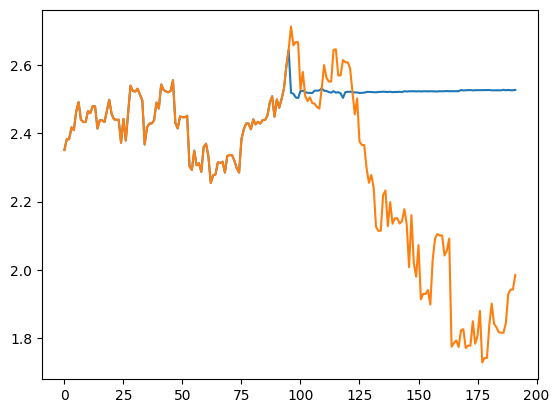

In [139]:
import matplotlib.pyplot as plt

idx = 70
var = -1
plt.plot(range(192), np.concatenate([trues_te[idx, :, var], preds_te[idx+96, :, var]]))
plt.plot(range(192), np.concatenate([trues_te[idx, :, var], trues_te[idx+96, :, var]]))
plt.show()

In [140]:
coef_

array([ 1.1327069 , -0.16317949,  0.03343371, -0.03550958], dtype=float32)

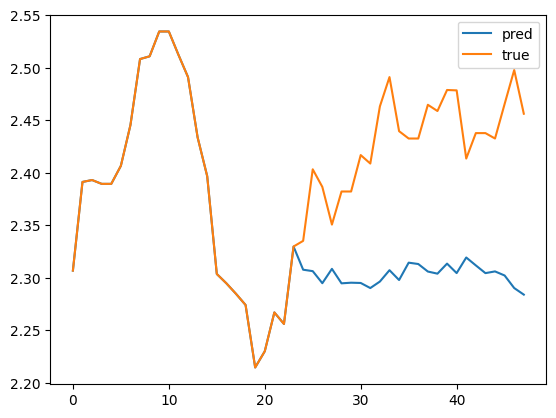

In [162]:
idx = 43
plt.plot(range(48), np.concatenate( [trues_te[idx,:24,-1], exp_model.model(torch.Tensor(trues_te[:, :24, :]).to("cuda:0"), None, None, None).detach().cpu().numpy()[idx, :, -1]]), label='pred')
plt.plot(range(48), trues_te[idx,:48,-1], label='true')
plt.legend()
plt.show()

In [166]:
# decomposition test

dataset_exchange_96_test[0][0].shape

(96, 8)

In [263]:
dataset_exchange_96_test[0][1]

array([[ 3.09977206, -0.60896908,  2.1775895 , ...,  3.34683733,
         3.07189512,  2.12391606],
       [ 3.09640665, -0.6069101 ,  2.17571563, ...,  3.34229661,
         3.07121216,  2.12801891],
       [ 3.09640665, -0.60661766,  2.17571563, ...,  3.34229661,
         3.07006192,  2.12801891],
       ...,
       [ 3.09593142, -0.54457384,  2.01029353, ...,  1.92468379,
         3.31069522,  2.43916431],
       [ 3.07664089, -0.61308106,  2.00138783, ...,  1.93830595,
         3.25183541,  2.37199711],
       [ 3.13818824, -0.57621643,  2.03798623, ...,  1.94829553,
         3.30007349,  2.44173515]])

In [168]:
# x_enc
x_enc = torch.stack([torch.Tensor(dataset_exchange_96_test[j][0]) for j in range(4)]).to('cuda:0')

In [169]:
x_enc.shape

torch.Size([4, 96, 8])

In [172]:
x_dec = torch.stack([torch.Tensor(dataset_exchange_96_test[j][1]) for j in range(4)]).to('cuda:0')

In [174]:
x_dec = x_dec[:, -96:, :]

In [252]:
x_dec0 = torch.stack([torch.Tensor(dataset_exchange_96_test[j][1]) for j in range(4)]).to('cuda:0')

In [254]:
MAE(x_enc[:, -48:, :].detach().cpu().numpy(), x_dec0[:, :48, :].detach().cpu().numpy())

1.9872955

In [257]:
x_dec0[:, :48, :]

tensor([[[ 3.0998, -0.6090,  2.1776,  ...,  3.3468,  3.0719,  2.1239],
         [ 3.0964, -0.6069,  2.1757,  ...,  3.3423,  3.0712,  2.1280],
         [ 3.0964, -0.6066,  2.1757,  ...,  3.3423,  3.0701,  2.1280],
         ...,
         [ 2.9140, -0.3829,  2.2714,  ...,  3.5094,  3.4395,  2.2249],
         [ 2.9156, -0.3843,  2.2714,  ...,  3.5103,  3.4395,  2.2249],
         [ 2.9330, -0.3867,  2.2844,  ...,  3.4594,  3.4448,  2.2474]],

        [[ 3.0964, -0.6069,  2.1757,  ...,  3.3423,  3.0712,  2.1280],
         [ 3.0964, -0.6066,  2.1757,  ...,  3.3423,  3.0701,  2.1280],
         [ 3.1226, -0.6043,  2.1798,  ...,  3.3686,  3.0746,  2.1431],
         ...,
         [ 2.9156, -0.3843,  2.2714,  ...,  3.5103,  3.4395,  2.2249],
         [ 2.9330, -0.3867,  2.2844,  ...,  3.4594,  3.4448,  2.2474],
         [ 2.9481, -0.3573,  2.2074,  ...,  3.4386,  3.4672,  2.1908]],

        [[ 3.0964, -0.6066,  2.1757,  ...,  3.3423,  3.0701,  2.1280],
         [ 3.1226, -0.6043,  2.1798,  ...,  3

In [260]:
x_enc[:, 48:, :]

tensor([[[ 0.5738, -0.4864,  0.4241,  ..., -1.2548, -0.3990, -0.1412],
         [ 0.5493, -0.4721,  0.4127,  ..., -1.3032, -0.4026, -0.1085],
         [ 0.5493, -0.4700,  0.4127,  ..., -1.3032, -0.4087, -0.1085],
         ...,
         [-0.7824,  1.0922,  0.9986,  ...,  0.4799,  1.5382,  0.6636],
         [-0.7713,  1.0819,  0.9986,  ...,  0.4896,  1.5382,  0.6636],
         [-0.6442,  1.0658,  1.0782,  ..., -0.0531,  1.5661,  0.8426]],

        [[ 0.5447, -0.4932,  0.3942,  ..., -1.3772, -0.4410, -0.1301],
         [ 0.5447, -0.4911,  0.3942,  ..., -1.3772, -0.4470, -0.1301],
         [ 0.7397, -0.4747,  0.4193,  ..., -1.0857, -0.4228, -0.0085],
         ...,
         [-0.8019,  1.0552,  0.9874,  ...,  0.4827,  1.5070,  0.6512],
         [-0.6723,  1.0391,  1.0679,  ..., -0.0803,  1.5349,  0.8323],
         [-0.5598,  1.2434,  0.5906,  ..., -0.3115,  1.6535,  0.3757]],

        [[ 0.5331, -0.5129,  0.3701,  ..., -1.4633, -0.4874, -0.1591],
         [ 0.7324, -0.4966,  0.3955,  ..., -1

In [175]:
means = x_enc.mean(1, keepdim=True).detach()
x_enc = x_enc - means
stdev = torch.sqrt(torch.var(x_enc, dim=1, keepdim=True, unbiased=False) + 1e-5)
x_enc /= stdev
x_dec = x_dec - means[0, 0, 0] * torch.ones_like(x_dec) # x_dec도 같이 표준화
x_dec = x_dec / stdev[0, 0, 0] * torch.ones_like(x_dec) 

In [179]:
x_enc_list = [x_enc[:,j*24:(j+1)*24, :] for j in range(4)] # 입력값 나누기
x_dec_list = [x_dec[:,j*24:(j+1)*24, :] for j in range(4)] # 출력값 나누기

In [251]:
x_enc_list[0].shape

torch.Size([4, 24, 8])

In [181]:
x_enc_list[0].shape

torch.Size([4, 24, 8])

In [186]:
base_model = exp_model.model

In [194]:
x_res1 = [] # 1단계 encoding
x_res = [[] for _ in range(4)] # n단계 encoding

In [195]:
# 1단계 텐서 입력
for k, x_enc_part in enumerate(x_enc_list):
    temp_enc = x_enc_part.clone() # 일단 복제
    # k -> x_seg_num - k번 반복
    for _ in range(4 - k):
        # 0텐서 사용
        temp_y_enc = torch.zeros(x_enc_part.shape[0], x_enc_part.shape[1]*3//2, x_enc_part.shape[2])
        temp_enc = base_model(temp_enc, None, temp_y_enc, None)
    x_res1.append(temp_enc)

# N단계 텐서 입력 -> x_res 채우기
x_res[0] = x_res1
for l in range(1, 4):
    temp_y_enc = torch.zeros(x_enc_part.shape[0], x_enc_part.shape[1]*3//2, x_enc_part.shape[2])
    x_res[l] = [base_model(enc_part, None, temp_y_enc, None) for enc_part in x_res[l-1]]

In [196]:
len(x_res), len(x_res[0])

(4, 4)

In [197]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        # 선형 레이어 정의 (y = Wx + b)
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.linear(x)


In [219]:
lrs = nn.ModuleList().to('cuda:0')
for i in range(4):
    lrs.append(nn.Linear(4,1).to('cuda:0'))

In [235]:
x_res_tensors = [torch.stack(encs).permute(1,2,3,0).reshape(-1,4).to('cuda:0') for encs in x_res]
y_res_tensors = [decs.reshape(-1, 1) for decs in x_dec_list]

In [236]:
x_res_tensors[0].shape, y_res_tensors[0].shape

(torch.Size([768, 4]), torch.Size([768, 1]))

In [239]:
coefs = [] # (a0,a1,a2,a3,b)
for j in range(4):
    y_res_tensors[j] = lrs[j](x_res_tensors[j])
    coef_ = lrs[j].weight[0]
    bias_ = lrs[j].bias
    coefs.append(torch.cat([coef_, bias_], axis=0))

In [240]:
coefs

[tensor([ 0.2180,  0.1328,  0.1933, -0.3433, -0.0937], device='cuda:0',
        grad_fn=<CatBackward0>),
 tensor([ 0.3669, -0.2887,  0.0725, -0.3750,  0.2191], device='cuda:0',
        grad_fn=<CatBackward0>),
 tensor([-0.1976, -0.4606,  0.3701, -0.0416,  0.2517], device='cuda:0',
        grad_fn=<CatBackward0>),
 tensor([ 0.1788,  0.0043,  0.3834, -0.1701,  0.2273], device='cuda:0',
        grad_fn=<CatBackward0>)]

In [242]:
from utils.metrics import *

In [246]:
idx = 2
MAE(x_res[0][idx].detach().cpu().numpy(), x_dec_list[idx].detach().cpu().numpy())

7.9917235

In [247]:
x_res[0][idx].detach().cpu().numpy()

array([[[1.8747675 , 1.6333113 , 1.6540275 , 1.5903393 , 0.76168233,
         1.3712597 , 1.6139808 , 1.9140346 ],
        [1.8836474 , 1.6387215 , 1.658486  , 1.5967461 , 0.76467144,
         1.382139  , 1.6193366 , 1.9231642 ],
        [1.8749067 , 1.6337116 , 1.6551794 , 1.5909445 , 0.76141334,
         1.3743035 , 1.6141868 , 1.9134641 ],
        [1.8814708 , 1.6397079 , 1.6590457 , 1.597816  , 0.76505715,
         1.3874388 , 1.6199589 , 1.9215783 ],
        [1.878743  , 1.6417745 , 1.6609718 , 1.6001209 , 0.76644325,
         1.3903688 , 1.6222444 , 1.9198091 ],
        [1.8849088 , 1.6466995 , 1.6646807 , 1.605402  , 0.7692413 ,
         1.3990902 , 1.62761   , 1.9286045 ],
        [1.8861495 , 1.6467296 , 1.664042  , 1.6057007 , 0.76903445,
         1.4018854 , 1.6270938 , 1.9286926 ],
        [1.8895135 , 1.6495436 , 1.6665891 , 1.6082865 , 0.770458  ,
         1.4035002 , 1.6302541 , 1.9332161 ],
        [1.8905197 , 1.6490566 , 1.6661322 , 1.607843  , 0.7701229 ,
         1.

In [249]:
x_dec_list[idx].detach().cpu().numpy()

array([[[ 1.04719746e+00, -2.48921585e+01, -6.02800989e+00,
         -1.59797873e-02, -1.54382706e+01, -5.00035584e-01,
          3.11595249e+00, -4.48797560e+00],
        [ 1.24534762e+00, -2.47309208e+01, -6.00015211e+00,
         -1.19286971e-02, -1.55209427e+01, -5.33191144e-01,
          3.13353729e+00, -4.20417261e+00],
        [ 1.31828988e+00, -2.46256790e+01, -5.84773540e+00,
          7.16935217e-01, -1.56173019e+01, -1.62733400e+00,
          3.14232898e+00, -3.74644303e+00],
        [ 1.44498265e+00, -2.45899448e+01, -5.94217634e+00,
          1.09495413e+00, -1.55279255e+01, -1.61407173e+00,
          3.29206610e+00, -3.72728777e+00],
        [ 1.54795384e+00, -2.44461365e+01, -5.92764664e+00,
          1.22319460e+00, -1.55209427e+01, -1.60080957e+00,
          3.33615994e+00, -3.55489087e+00],
        [ 1.50886178e+00, -2.44461365e+01, -5.93857765e+00,
          1.22319460e+00, -1.55209427e+01, -1.59417844e+00,
          3.33615994e+00, -3.55489087e+00],
        [ 1.4370

In [233]:
x_res[0][0].shape

torch.Size([4, 24, 8])

In [264]:
x_res[1][0].shape

torch.Size([4, 24, 8])

In [267]:
x_res[1][0][:, :-4, :].shape

torch.Size([4, 20, 8])

In [277]:
df_exchange = pd.read_csv('./dataset/exchange_rate/exchange_rate.csv')

In [278]:
df_exchange = df_exchange.drop(columns=['date'])

In [280]:
num_total = len(df_exchange)
num_train = int(num_total * 0.7)
num_test = int(num_total * 0.2)
num_vali = num_total - num_train - num_test
border1s = [0, num_train - 96, num_total - num_test - 96]
border2s = [num_train, num_train + num_vali, num_total]
border1 = border1s[2]
border2 = border2s[2]

In [282]:
border2 - border1

1613

In [284]:
idx = 0
df_exchange.iloc[border1:border1+24]

,0,1,2,3,4,5,6,OT
5975,1.006401,1.558944,0.976372,1.046835,0.157104,0.012433,0.782411,0.790576
5976,1.006644,1.558944,0.976372,1.046835,0.157104,0.012433,0.782105,0.790576
5977,0.999151,1.556178,0.971506,1.040691,0.157089,0.012565,0.779970,0.786596
5978,1.005753,1.563233,0.975610,1.039825,0.157141,0.012582,0.782819,0.791327
5979,1.006857,1.556711,0.974944,1.037990,0.157270,0.012545,0.783208,0.791202
5980,1.000650,1.548947,0.965978,1.033699,0.157270,0.012593,0.779989,0.784929
5981,1.024233,1.568874,0.982130,1.053674,0.157354,0.012522,0.789204,0.802504
5982,1.023898,1.570549,0.983671,1.055264,0.157356,0.012528,0.790264,0.801475
5983,1.024149,1.570549,0.983671,1.055264,0.157356,0.012528,0.790264,0.801475
5984,1.024296,1.568874,0.982318,1.047186,0.157488,0.012588,0.789141,0.803600


In [286]:
# 우선 standardscaler 사용
from sklearn.preprocessing import StandardScaler

# weather_df에서 train data 얻기
scaler = StandardScaler()
train_data = df_exchange[border1s[0]:border2s[0]]
scaler.fit(train_data.values)
df_data = scaler.transform(df_exchange.values)

In [289]:
df_data[border1:border1+24]

array([[ 2.74921602, -0.67234377,  1.84301689,  2.78282589,  0.78109494,
         3.21969717,  2.79752751,  1.94913024],
       [ 2.75157278, -0.67234377,  1.84301689,  2.78282589,  0.78109494,
         3.21969717,  2.79202794,  1.94913024],
       [ 2.67890114, -0.68885139,  1.79601561,  2.72405395,  0.78052119,
         3.33957218,  2.75365673,  1.90736717],
       [ 2.74293132, -0.64674682,  1.83565664,  2.71577002,  0.7825102 ,
         3.35501063,  2.80486028,  1.95701066],
       [ 2.75363858, -0.68567042,  1.82922366,  2.69821688,  0.78744449,
         3.3214093 ,  2.81185156,  1.95569901],
       [ 2.69343935, -0.73200635,  1.74261999,  2.65717027,  0.78744449,
         3.36500021,  2.75399821,  1.88987495],
       [ 2.92216153, -0.61308106,  1.8986341 ,  2.84824602,  0.79065752,
         3.30052198,  2.91961445,  2.07429355],
       [ 2.9189125 , -0.60308458,  1.91351881,  2.86345555,  0.79073402,
         3.30597085,  2.93866526,  2.06349601],
       [ 2.92134685, -0.60308458

In [295]:
%whos

Variable                          Type                      Data/Info
---------------------------------------------------------------------
CORR                              function                  <function CORR at 0x7f3a084bb8b0>
DataLoader                        type                      <class 'torch.utils.data.dataloader.DataLoader'>
Dataset_Custom                    type                      <class 'data_provider.dat<...>a_loader.Dataset_Custom'>
Exp_Anomaly_Detection             type                      <class 'exp.exp_anomaly_d<...>n.Exp_Anomaly_Detection'>
Exp_Classification                type                      <class 'exp.exp_classific<...>tion.Exp_Classification'>
Exp_Imputation                    type                      <class 'exp.exp_imputation.Exp_Imputation'>
Exp_Long_Term_Forecast            type                      <class 'exp.exp_long_term<...>.Exp_Long_Term_Forecast'>
Exp_Long_Term_Forecast_Partial    type                      <class 'exp.exp_long_term<...

In [297]:
len(dataset_exchange_96_test), int(len(df_data)*0.2)

(1422, 1517)

In [309]:
dataset_exchange_96_test[-97][0].shape

(96, 8)

In [313]:
MAE(df_data[-96:], dataset_exchange_96_test[-97][0])

0.024077684808793326